This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 2 embryo particles with calculated initial status according to the hypothesis, whose mass are $15M_{\oplus}$ respectively.

After that we, considering the collision and merger, integrate the system for a preinstall long time units and plot the figure.

In [21]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e3*2.*np.pi

#np.random.seed(12)

In [22]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [23]:
# Embryos
# 行星胚胎群总距离 a = 7 AU
n_embryos = 2
e = random.randint(1,10)*0.001*np.pi/180
inc = random.randint(1,10)*0.001*np.pi/180
Omega = random.randint(0,360)*np.pi/180
omega = random.randint(0,360)*np.pi/180
m = 15*3.040432648022642e-06
rho = 3
r = (((m*1.988e33)/(4*np.pi))**(1/3))/1.4960e13
a_default = 7 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.7 * hillradii + 7 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, inc = inc, Omega = Omega, omega = omega, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [24]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	5
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f363afe19d8, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f363afe1950, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7f363afe19d8, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7f363afe1950, m=4.560648972033963e-05 x=6.077919040687239 y=-0.8542854378130114 z=-0.0006231936917053543 vx=0.05626797651863389 vy=0.40075932875746967 vz=1.023271440419359e-05>
<rebound.particle.Particle object at 0x7f363afe19d8, m=4.560648972033963e-05 x=-0.7238606086397616 y=6.211512343403206 z=0.0003144036132

In [25]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
4.560648972033963e-05
4.560648972033963e-05


In [26]:
sim.move_to_com()
E0 = sim.calculate_energy()

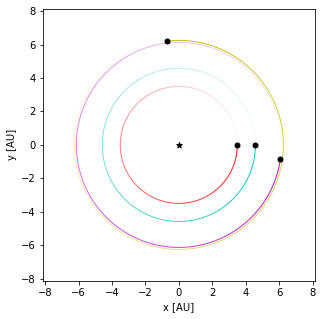

In [27]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [28]:
sim.getWidget(size=(500,300),scale=2.0*a_saturn)

Widget(N=5, count=2, height=300.0, orbit_data=b'2:\xa0\xbb\x13\xda\x7f\xb9\x91\x9eq2\x00\x00`@M\xc9_%\xdb\x0fI…

In [29]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

1.8149272045475991e-12


In [30]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	5
Selected integrator: 	mercurius
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f363ae9a620, m=1.0 x=-0.0008501747423972515 y=0.00266766672124482 z=-4.184933508548093e-08 vx=-0.00045315459249707705 vy=-0.00010009595604708504 vz=2.1016093936972923e-09>
<rebound.particle.Particle object at 0x7f363ae9a950, m=0.0009547919152112404 x=0.02313828795928505 y=-3.4690649399714806 z=9.839568087766637e-06 vx=0.5374431215242575 vy=0.008757276783823745 vz=-5.109928991833739e-07>
<rebound.particle.Particle object at 0x7f363ae9a620, m=0.0002858856727222417 x=4.405681731767882 y=1.7788980693051661 z=-3.579030035676764e-05 vx=-0.17938005836975404 vy=0.41641554597184177 vz=-7.413264015813907e-07>
<rebound.particle.Particle object at 0x7f363ae9a950, m=4.560648972033963e-05 x=-5